Rainfall Prediction - Weather Forecasting



Problem Statement:

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
 
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset available below:




Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
https://github.com/dsrscientist/dataset3

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [39]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
df.shape

(8425, 23)

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

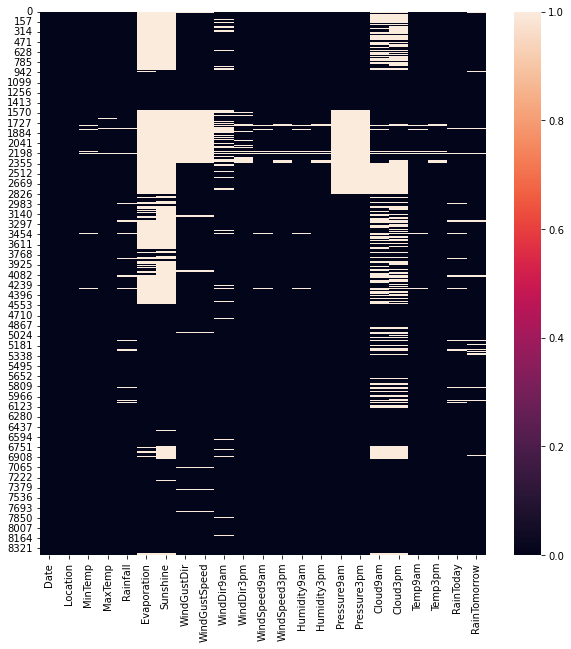

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [74]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].median())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].median())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [75]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

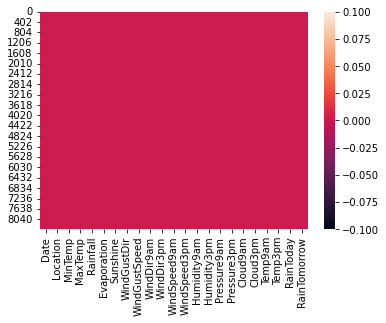

In [81]:
sns.heatmap(df.isnull())

In [50]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [61]:
for i in df:
    print(i,":",df[i].unique())
    print("--------------------------------------------")

Date : ['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']
--------------------------------------------
Location : ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
--------------------------------------------
MinTemp : [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2

In [51]:
for i in df:
    print("----------------------------------------------------------")
    print(i,":",df[i].value_counts())
    print('----------------------------------------------------------')
    print(i,":",df.dtypes[i])
    print("----------------------------------------------------------")

----------------------------------------------------------
Date : 2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
----------------------------------------------------------
Date : object
----------------------------------------------------------
----------------------------------------------------------
Location : Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
----------------------------------------------------------
Location : object
----------------------------------------------------------
----------------------------------------------------------
MinTemp :  12.0    74
 13.2    71
 13.8  

In [21]:
for i in df:
    print("----------------------------------------------------")
    print(i,":",df.loc[df[i]==" "])
    print("-----------------------------------------------------")

----------------------------------------------------
Date : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
-----------------------------------------------------
----------------------------------------------------
Location : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
-----------------------------------------------------
----------------------------------------------------
MinTemp : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rai

In [43]:
for i in df:
    print("----------------------------------------------------")
    print(i,":",df.loc[df[i]=="nan"])
    print("-----------------------------------------------------")

----------------------------------------------------
Date : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
-----------------------------------------------------
----------------------------------------------------
Location : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
-----------------------------------------------------
----------------------------------------------------
MinTemp : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rai

In [23]:
for i in df:
    print("----------------------------------------------------")
    print(i,":",df.loc[df[i]=="NaN"])
    print("-----------------------------------------------------")

----------------------------------------------------
Date : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
-----------------------------------------------------
----------------------------------------------------
Location : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
-----------------------------------------------------
----------------------------------------------------
MinTemp : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rai

In [24]:
for i in df:
    print("----------------------------------------------------")
    print(i,":",df.loc[df[i]=="Null"])
    print("-----------------------------------------------------")

----------------------------------------------------
Date : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
-----------------------------------------------------
----------------------------------------------------
Location : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
-----------------------------------------------------
----------------------------------------------------
MinTemp : Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rai

In [68]:
df_cat=[]

for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        df_cat.append(i)
    
df_cat

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [70]:
df_num=[]

for i in df.dtypes.index:
    if df.dtypes[i]=="int64" or df.dtypes[i]=="float64":
        df_num.append(i)
    
df_num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [77]:
for i in df_num:
    print(df[i].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [78]:
for i in df_cat:
    print(df[i].dtypes)

object
object
object
object
object
object
object


In [82]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.194255,23.855988,2.805913,5.389395,7.632205,40.036320,13.840000,18.539585,67.823739,51.246766,1017.649519,1015.246030,4.566622,4.503183,17.762015,22.442934
std,5.379497,6.114697,10.309308,3.852004,2.825451,13.781296,10.128896,9.704899,16.774237,18.311914,6.275796,6.217494,2.429205,2.299419,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.300000,23.300000,0.000000,5.389395,7.632205,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,4.566622,4.503183,17.762015,22.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [83]:
df.drop(['Date'],inplace=True,axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,5.389395,7.632205,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,Uluru,3.6,25.3,0.0,5.389395,7.632205,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,Uluru,5.4,26.9,0.0,5.389395,7.632205,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,Uluru,7.8,27.0,0.0,5.389395,7.632205,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


In [84]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.717522,0.087741,0.254965,0.056190,0.230200,0.136643,0.178137,-0.130711,0.079143,-0.429683,-0.423261,0.091593,0.038410,0.887108,0.685502
MaxTemp,0.717522,1.000000,-0.087375,0.322398,0.378365,0.139909,0.013444,0.088300,-0.391081,-0.421952,-0.325758,-0.403283,-0.253956,-0.250181,0.866084,0.974498
Rainfall,0.087741,-0.087375,1.000000,0.023517,-0.169432,0.085264,0.050480,0.024754,0.228799,0.235455,-0.072665,-0.033648,0.185444,0.150760,-0.007083,-0.090687
Evaporation,0.254965,0.322398,0.023517,1.000000,0.226001,0.135438,0.103321,0.101160,-0.213109,-0.161659,-0.177786,-0.189557,-0.062283,-0.108022,0.305264,0.315109
Sunshine,0.056190,0.378365,-0.169432,0.226001,1.000000,-0.013973,-0.018087,0.030154,-0.360836,-0.440269,0.021887,-0.035861,-0.533391,-0.547304,0.250640,0.395324
WindGustSpeed,0.230200,0.139909,0.085264,0.135438,-0.013973,1.000000,0.606090,0.639042,-0.271865,-0.093637,-0.407139,-0.372553,0.025104,0.079348,0.202277,0.102006
WindSpeed9am,0.136643,0.013444,0.050480,0.103321,-0.018087,0.606090,1.000000,0.560340,-0.358391,-0.110545,-0.175584,-0.139429,-0.000605,0.058136,0.109639,-0.002766
WindSpeed3pm,0.178137,0.088300,0.024754,0.101160,0.030154,0.639042,0.560340,1.000000,-0.250930,-0.091056,-0.252752,-0.208694,0.004851,0.003307,0.184066,0.066150
Humidity9am,-0.130711,-0.391081,0.228799,-0.213109,-0.360836,-0.271865,-0.358391,-0.250930,1.000000,0.633285,0.142861,0.173934,0.404743,0.296874,-0.378344,-0.382404
Humidity3pm,0.079143,-0.421952,0.235455,-0.161659,-0.440269,-0.093637,-0.110545,-0.091056,0.633285,1.000000,0.001702,0.070454,0.424415,0.439964,-0.130360,-0.491483


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


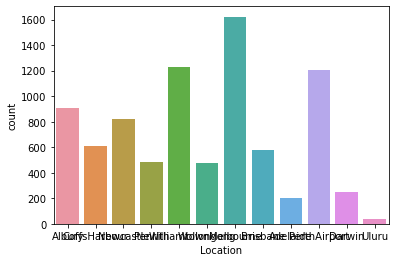

In [87]:
sns.countplot(df['Location'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


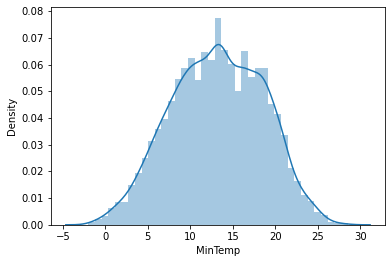

In [95]:
sns.distplot(df['MinTemp'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


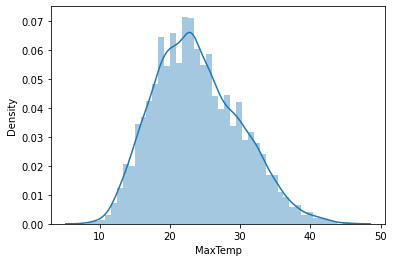

In [94]:
sns.distplot(df['MaxTemp'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


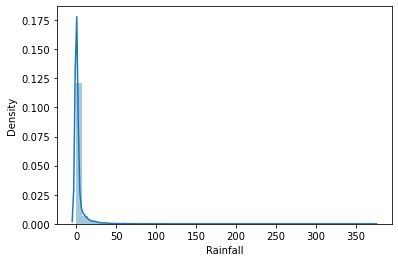

In [96]:
sns.distplot(df['Rainfall'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


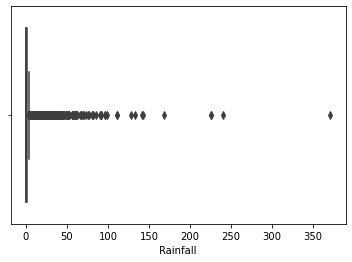

In [135]:
sns.boxplot(df['Rainfall'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


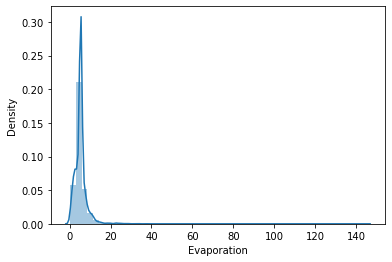

In [133]:
sns.distplot(df['Evaporation'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


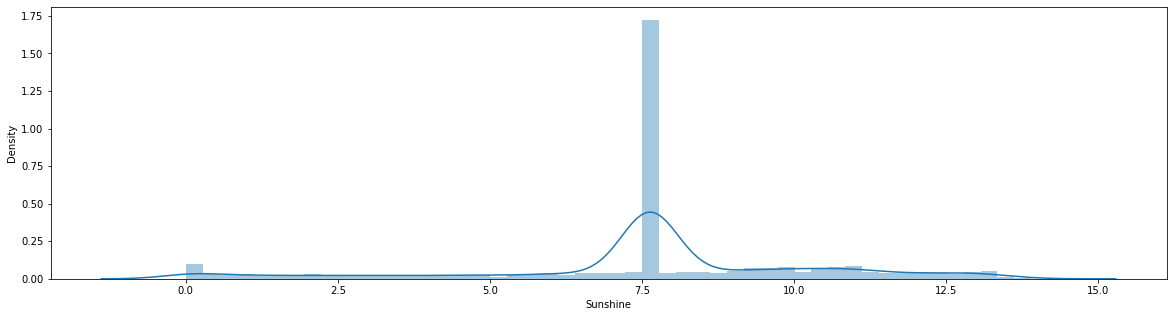

In [132]:
plt.figure(figsize=(20,5))
sns.distplot(df['Sunshine'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


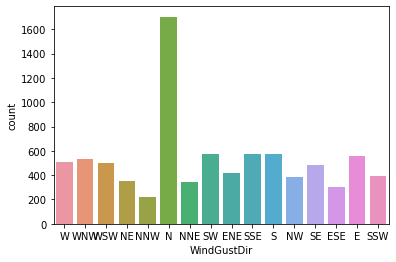

In [108]:
sns.countplot(df['WindGustDir'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


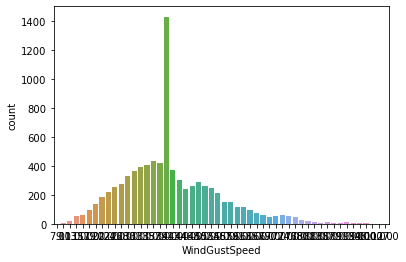

In [109]:
sns.countplot(df['WindGustSpeed'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


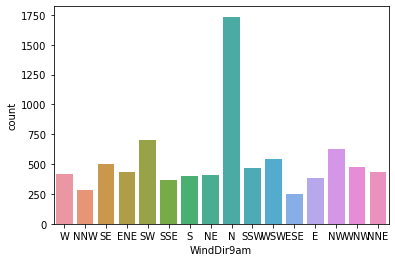

In [110]:
sns.countplot(df['WindDir9am'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


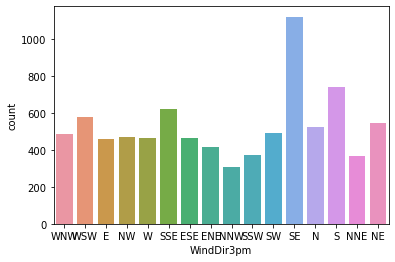

In [111]:
sns.countplot(df['WindDir3pm'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


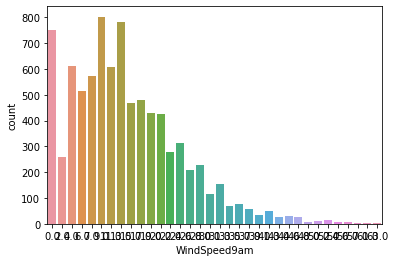

In [112]:
sns.countplot(df['WindSpeed9am'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


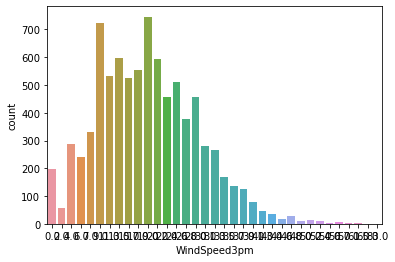

In [113]:
sns.countplot(df['WindSpeed3pm'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


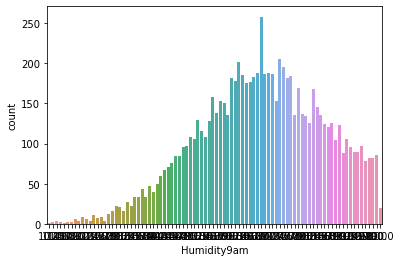

In [114]:
sns.countplot(df['Humidity9am'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


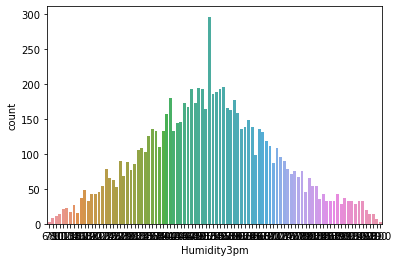

In [115]:
sns.countplot(df['Humidity3pm'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


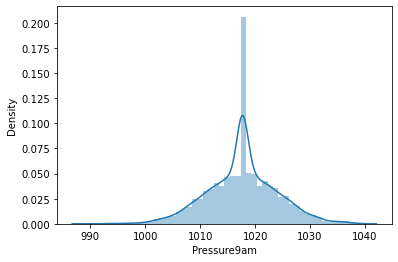

In [118]:
sns.distplot(df['Pressure9am'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


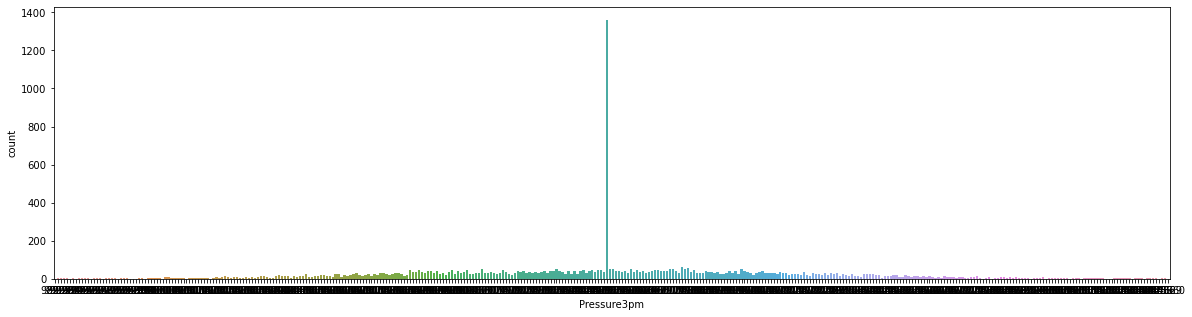

In [126]:
plt.figure(figsize=(20,5))
sns.countplot(df['Pressure3pm'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


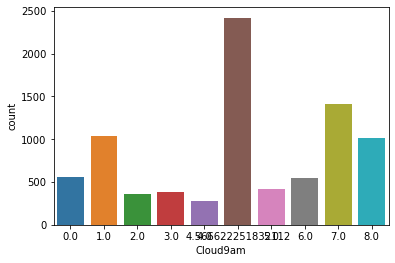

In [120]:
sns.countplot(df['Cloud9am'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


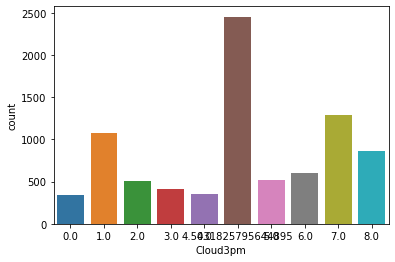

In [121]:
sns.countplot(df['Cloud3pm'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


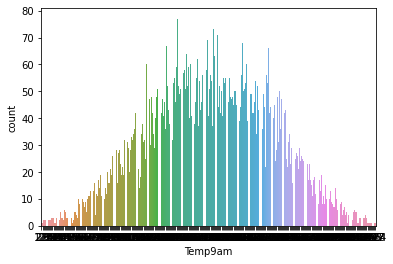

In [122]:
sns.countplot(df['Temp9am'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


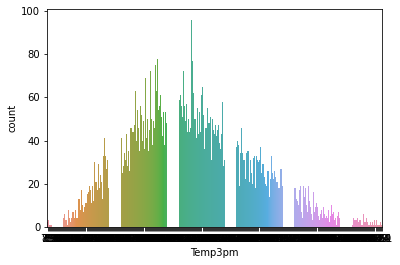

In [123]:
sns.countplot(df['Temp3pm'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


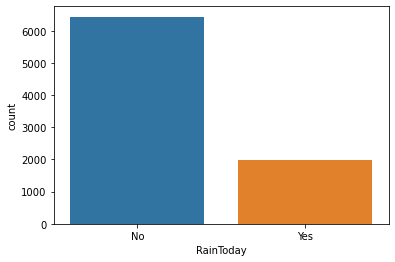

In [124]:
sns.countplot(df['RainToday'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


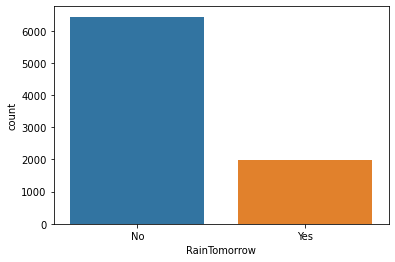

In [125]:
sns.countplot(df['RainTomorrow'])
plt.show()

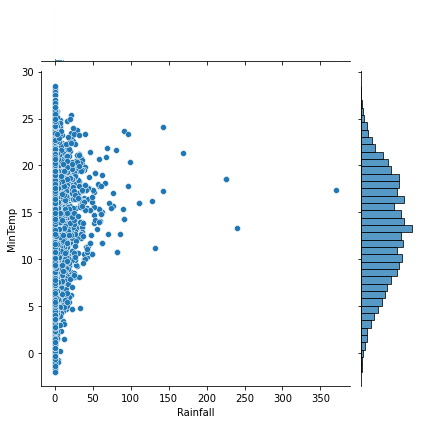

In [137]:
sns.jointplot(x='Rainfall',y='MinTemp',data=df)
plt.show()

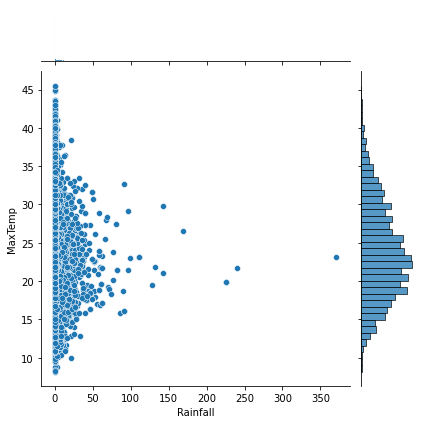

In [139]:
sns.jointplot(x='Rainfall',y='MaxTemp',data=df)
plt.show()

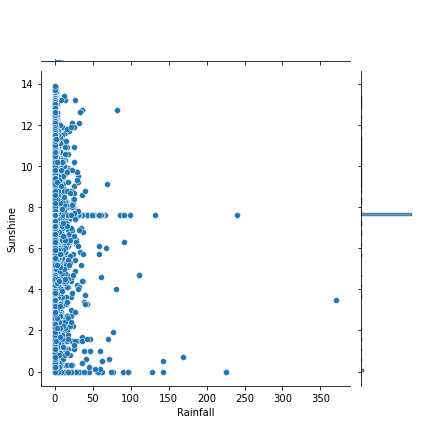

In [140]:
sns.jointplot(x='Rainfall',y='Sunshine',data=df)
plt.show()

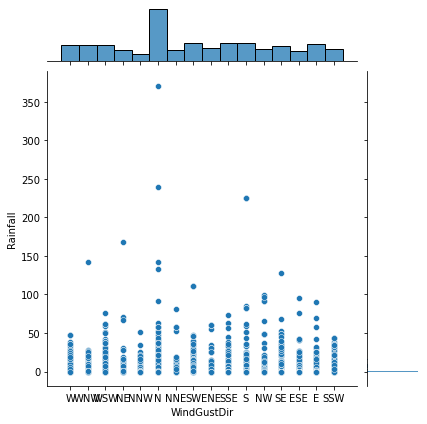

In [141]:
sns.jointplot(x='WindGustDir',y='Rainfall',data=df)
plt.show()

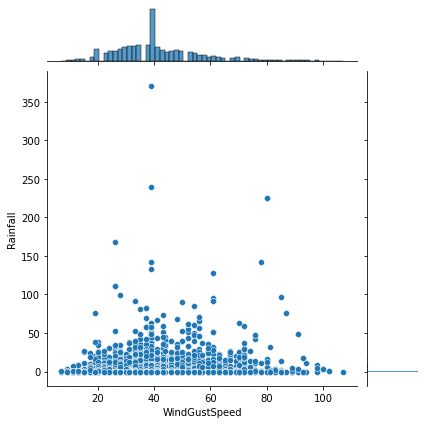

In [142]:
sns.jointplot(x='WindGustSpeed',y='Rainfall',data=df)
plt.show()

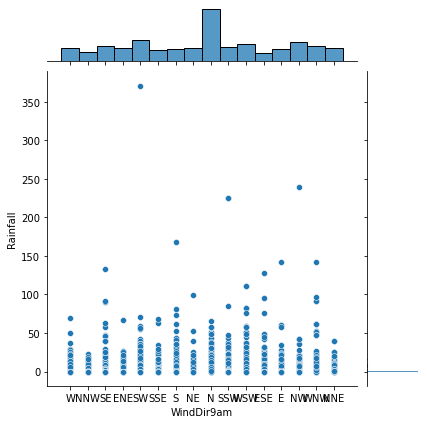

In [143]:
sns.jointplot(x='WindDir9am',y='Rainfall',data=df)
plt.show()

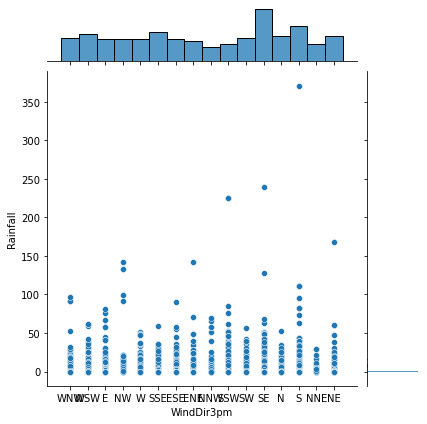

In [145]:
sns.jointplot(x='WindDir3pm',y='Rainfall',data=df)
plt.show()

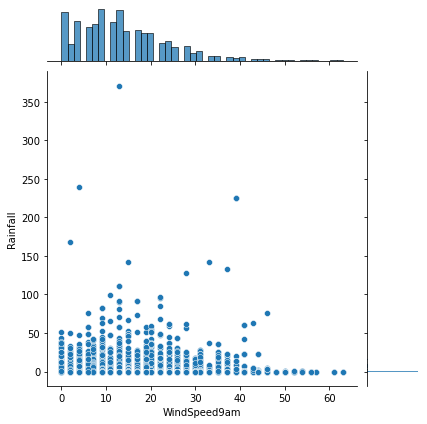

In [146]:
sns.jointplot(x='WindSpeed9am',y='Rainfall',data=df)
plt.show()

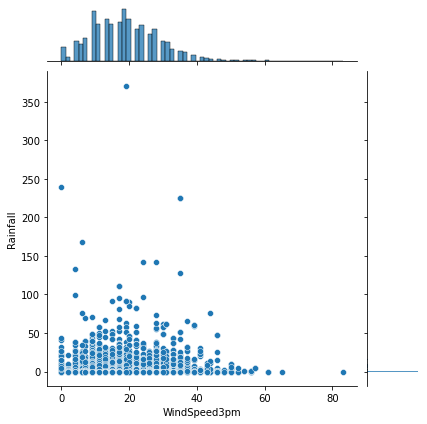

In [147]:
sns.jointplot(x='WindSpeed3pm',y='Rainfall',data=df)
plt.show()

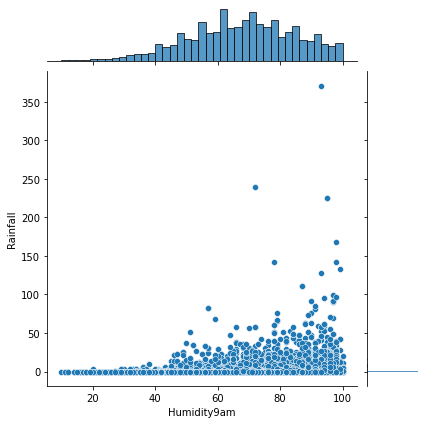

In [148]:
sns.jointplot(x='Humidity9am',y='Rainfall',data=df)
plt.show()

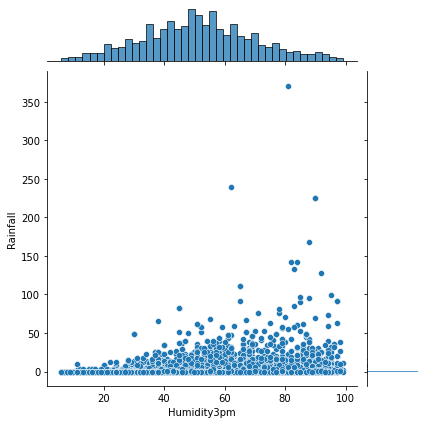

In [149]:
sns.jointplot(x='Humidity3pm',y='Rainfall',data=df)
plt.show()

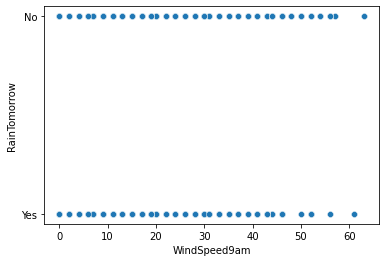

In [151]:
sns.scatterplot(x='WindSpeed9am',y='RainTomorrow',data=df)
plt.show()

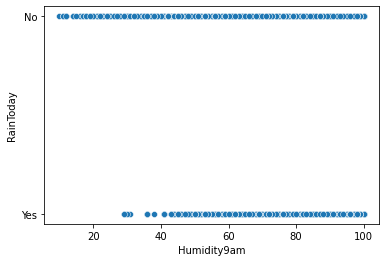

In [152]:
sns.scatterplot(x='Humidity9am',y='RainToday',data=df)
plt.show()

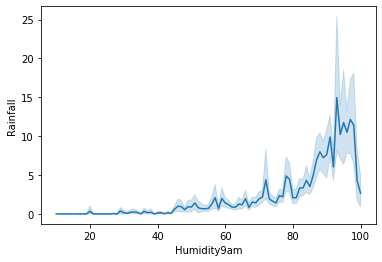

In [153]:
sns.lineplot(x='Humidity9am',y='Rainfall',data=df)
plt.show()

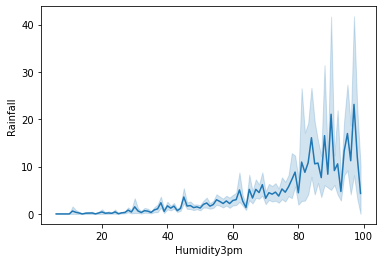

In [154]:
sns.lineplot(x='Humidity3pm',y='Rainfall',data=df)
plt.show()

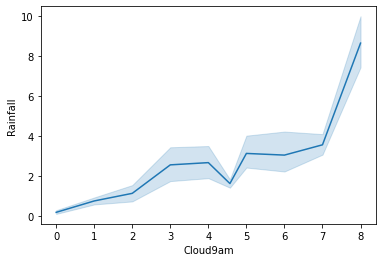

In [155]:
sns.lineplot(x='Cloud9am',y='Rainfall',data=df)
plt.show()

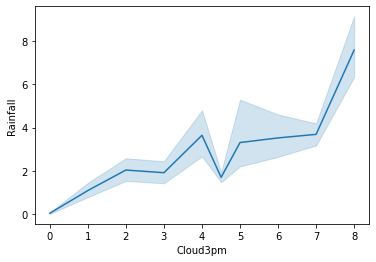

In [156]:
sns.lineplot(x='Cloud3pm',y='Rainfall',data=df)
plt.show()

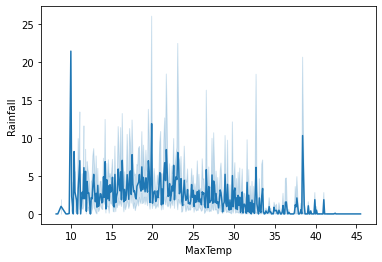

In [157]:
sns.lineplot(x='MaxTemp',y='Rainfall',data=df)
plt.show()

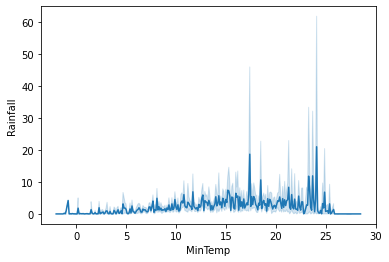

In [158]:
sns.lineplot(x='MinTemp',y='Rainfall',data=df)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

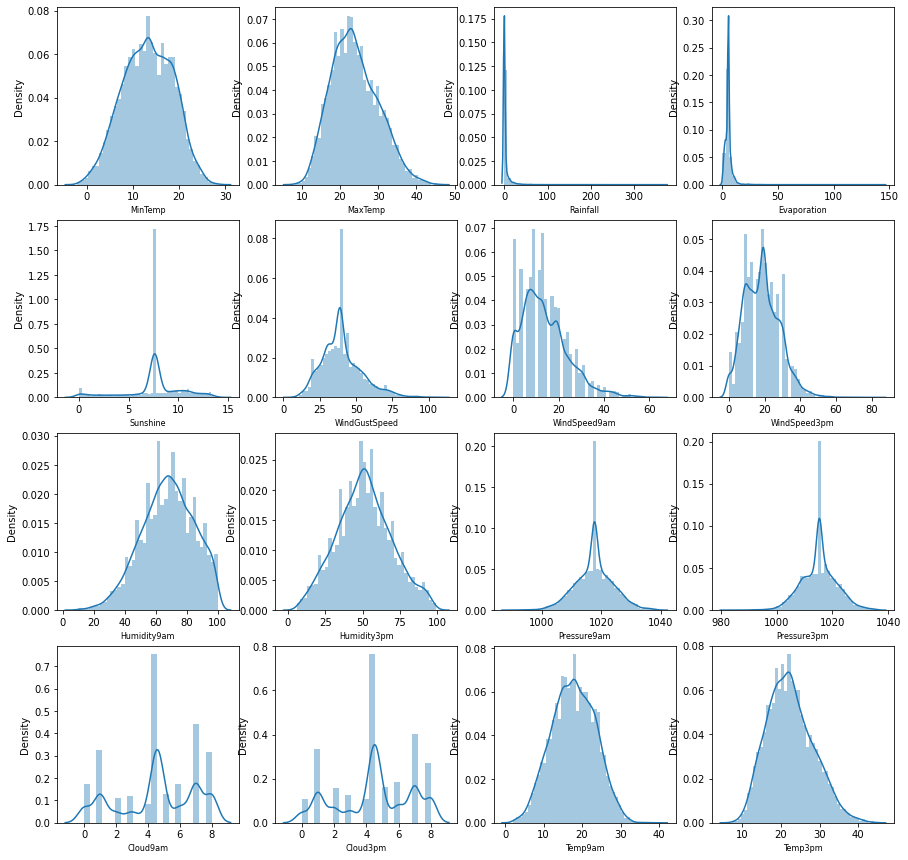

In [160]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for col in df_num:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=8)
    plotnum+=1
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

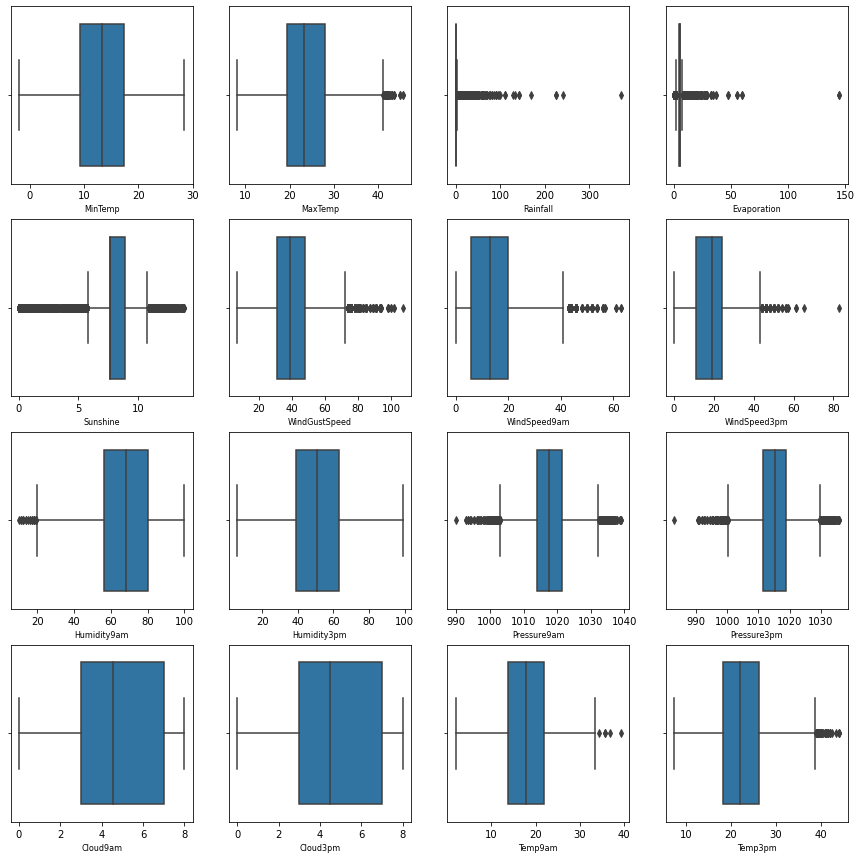

In [159]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for col in df_num:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=8)
    plotnum+=1
plt.show()

In [164]:
sns.pairplot(df,hue="RainToday",palette="Dark2")
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E42EFDAE50> (for post_execute):


KeyboardInterrupt: 

In [189]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        
print(df)

      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0          1.0     13.4     22.9  0.534236     0.195503  7.632205   
1          1.0      7.4     25.1 -0.698529     0.195503  7.632205   
2          1.0     12.9     25.7 -0.698529     0.195503  7.632205   
3          1.0      9.2     28.0 -0.698529     0.195503  7.632205   
4          1.0     17.5     32.3  0.888946     0.195503  7.632205   
...        ...      ...      ...       ...          ...       ...   
8420       9.0      2.8     23.4 -0.698529     0.195503  7.632205   
8421       9.0      3.6     25.3 -0.698529     0.195503  7.632205   
8422       9.0      5.4     26.9 -0.698529     0.195503  7.632205   
8423       9.0      7.8     27.0 -0.698529     0.195503  7.632205   
8424       9.0     14.9     23.3 -0.698529     0.195503  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0            13.0           44.0        13.0        14.0  ...         71.0   
1            14

Remove Outliers:

In [190]:
# Using Inter Quantile Range Method for the removal of the outlier:
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1

df1=df[~((df<(q1-1.5*iqr))|(df>(1.5*iqr+q3))).any(axis=1)]
df1.reset_index(inplace=True)
df1

,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1.0,13.4,22.9,0.534236,0.195503,7.632205,13.0,44.0,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,1,1.0,7.4,25.1,-0.698529,0.195503,7.632205,14.0,44.0,6.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,2,1.0,12.9,25.7,-0.698529,0.195503,7.632205,15.0,46.0,13.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,3,1.0,9.2,28.0,-0.698529,0.195503,7.632205,4.0,24.0,9.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,4,1.0,17.5,32.3,0.888946,0.195503,7.632205,13.0,41.0,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,8420,9.0,2.8,23.4,-0.698529,0.195503,7.632205,0.0,31.0,9.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
3207,8421,9.0,3.6,25.3,-0.698529,0.195503,7.632205,6.0,22.0,9.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
3208,8422,9.0,5.4,26.9,-0.698529,0.195503,7.632205,3.0,37.0,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0
3209,8423,9.0,7.8,27.0,-0.698529,0.195503,7.632205,9.0,28.0,10.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


In [191]:
df1.skew()

index            0.492878
Location        -0.047559
MinTemp         -0.064025
MaxTemp          0.239055
Rainfall         2.824159
Evaporation     -1.093922
Sunshine         1.372639
WindGustDir      0.234623
WindGustSpeed    0.196963
WindDir9am       0.232484
WindDir3pm      -0.065860
WindSpeed9am     0.856732
WindSpeed3pm     0.319267
Humidity9am     -0.025769
Humidity3pm      0.017811
Pressure9am      0.021215
Pressure3pm     -0.043706
Cloud9am        -0.331555
Cloud3pm        -0.222776
Temp9am         -0.200318
Temp3pm          0.264141
RainToday        0.000000
RainTomorrow     0.000000
dtype: float64

In [192]:
data_loss_df1=((8425-4221)/8425*100)-1
data_loss_df1

48.89910979228487

In [193]:
# Using Zscore method:
num=df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]
from scipy.stats import zscore
z=np.abs(zscore(num))
threshold=3
df2=df[(z<3).all(axis=1)]
df2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.0,13.4,22.9,0.534236,0.195503,7.632205,13.0,44.0,13.0,14.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,1.0,7.4,25.1,-0.698529,0.195503,7.632205,14.0,44.0,6.0,15.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,1.0,12.9,25.7,-0.698529,0.195503,7.632205,15.0,46.0,13.0,15.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,1.0,9.2,28.0,-0.698529,0.195503,7.632205,4.0,24.0,9.0,0.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,1.0,17.5,32.3,0.888946,0.195503,7.632205,13.0,41.0,1.0,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.4,-0.698529,0.195503,7.632205,0.0,31.0,9.0,1.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
8421,9.0,3.6,25.3,-0.698529,0.195503,7.632205,6.0,22.0,9.0,3.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
8422,9.0,5.4,26.9,-0.698529,0.195503,7.632205,3.0,37.0,9.0,14.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0
8423,9.0,7.8,27.0,-0.698529,0.195503,7.632205,9.0,28.0,10.0,3.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


In [194]:
df2.skew()

Location        -0.039292
MinTemp         -0.100653
MaxTemp          0.321654
Rainfall         0.904967
Evaporation     -0.572608
Sunshine        -0.726529
WindGustDir      0.113743
WindGustSpeed    0.540939
WindDir9am       0.153996
WindDir3pm      -0.127026
WindSpeed9am     0.715486
WindSpeed3pm     0.299528
Humidity9am     -0.230116
Humidity3pm      0.131187
Pressure9am      0.015366
Pressure3pm      0.036332
Cloud9am        -0.361027
Cloud3pm        -0.271496
Temp9am         -0.043830
Temp3pm          0.338587
RainToday        1.245059
RainTomorrow     1.260555
dtype: float64

In [195]:
data_loss_df2=((8425-7987)/8425*100)-1
data_loss_df2

4.198813056379822

Hence, we accept zscore method for the removal of the outliers

Check and remove the skewness:

In [196]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [197]:
#take the threshold=.7
skew=['Rainfall','Evaporation']
df2[skew]=pt.fit_transform(df2[skew].values)

df2.skew()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Location        -0.039292
MinTemp         -0.100653
MaxTemp          0.321654
Rainfall         0.658512
Evaporation      0.191326
Sunshine        -0.726529
WindGustDir      0.113743
WindGustSpeed    0.540939
WindDir9am       0.153996
WindDir3pm      -0.127026
WindSpeed9am     0.715486
WindSpeed3pm     0.299528
Humidity9am     -0.230116
Humidity3pm      0.131187
Pressure9am      0.015366
Pressure3pm      0.036332
Cloud9am        -0.361027
Cloud3pm        -0.271496
Temp9am         -0.043830
Temp3pm          0.338587
RainToday        1.245059
RainTomorrow     1.260555
dtype: float64

Now the skewness removed from the df2 data.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

ValueError: num must be 1 <= num <= 9, not 10

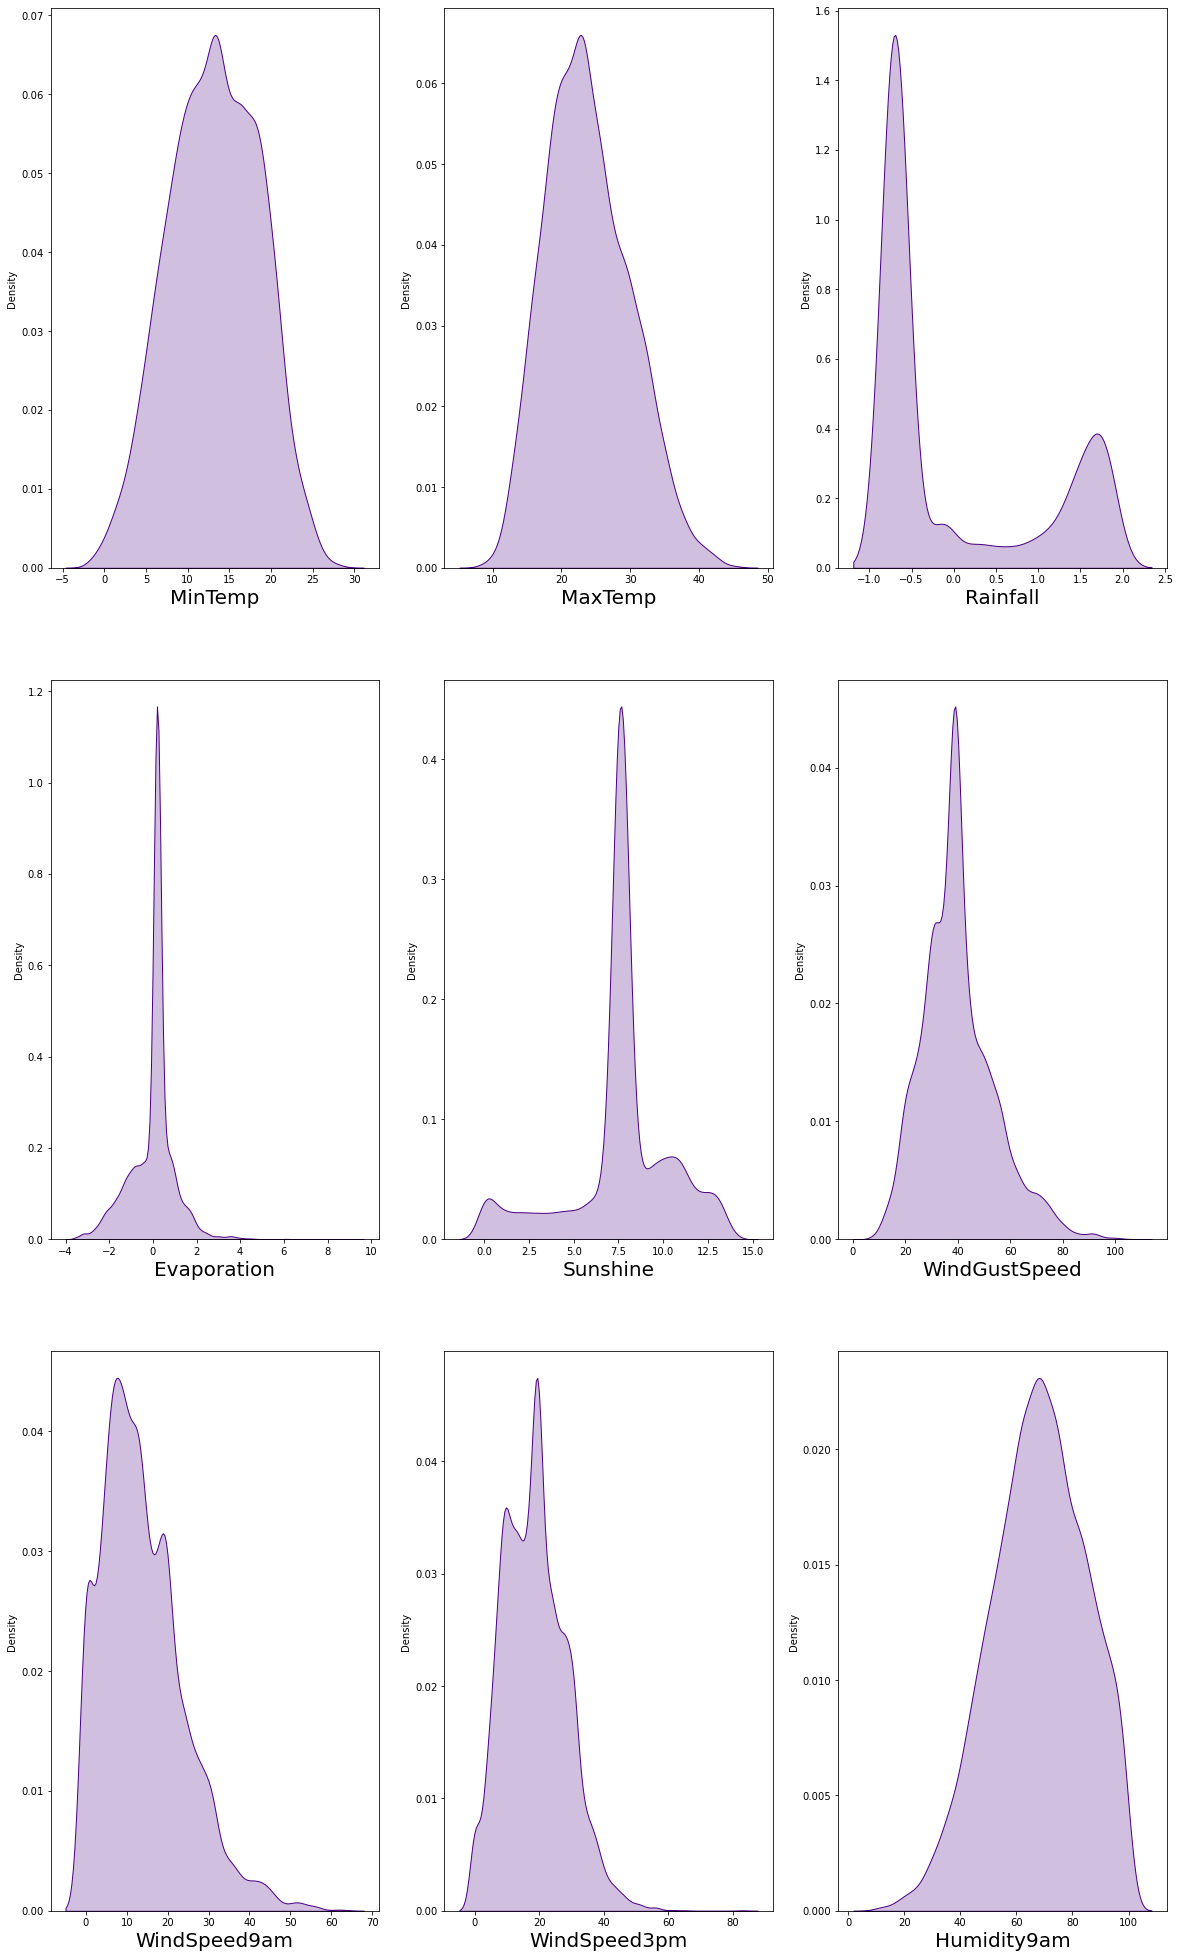

In [198]:
plt.figure(figsize=(20,35))
plotnumber=1

for i in df[df_num]:
    if plotnumber<=25:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[i],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()
    

KeyboardInterrupt: 

<Figure size 1440x2880 with 0 Axes>

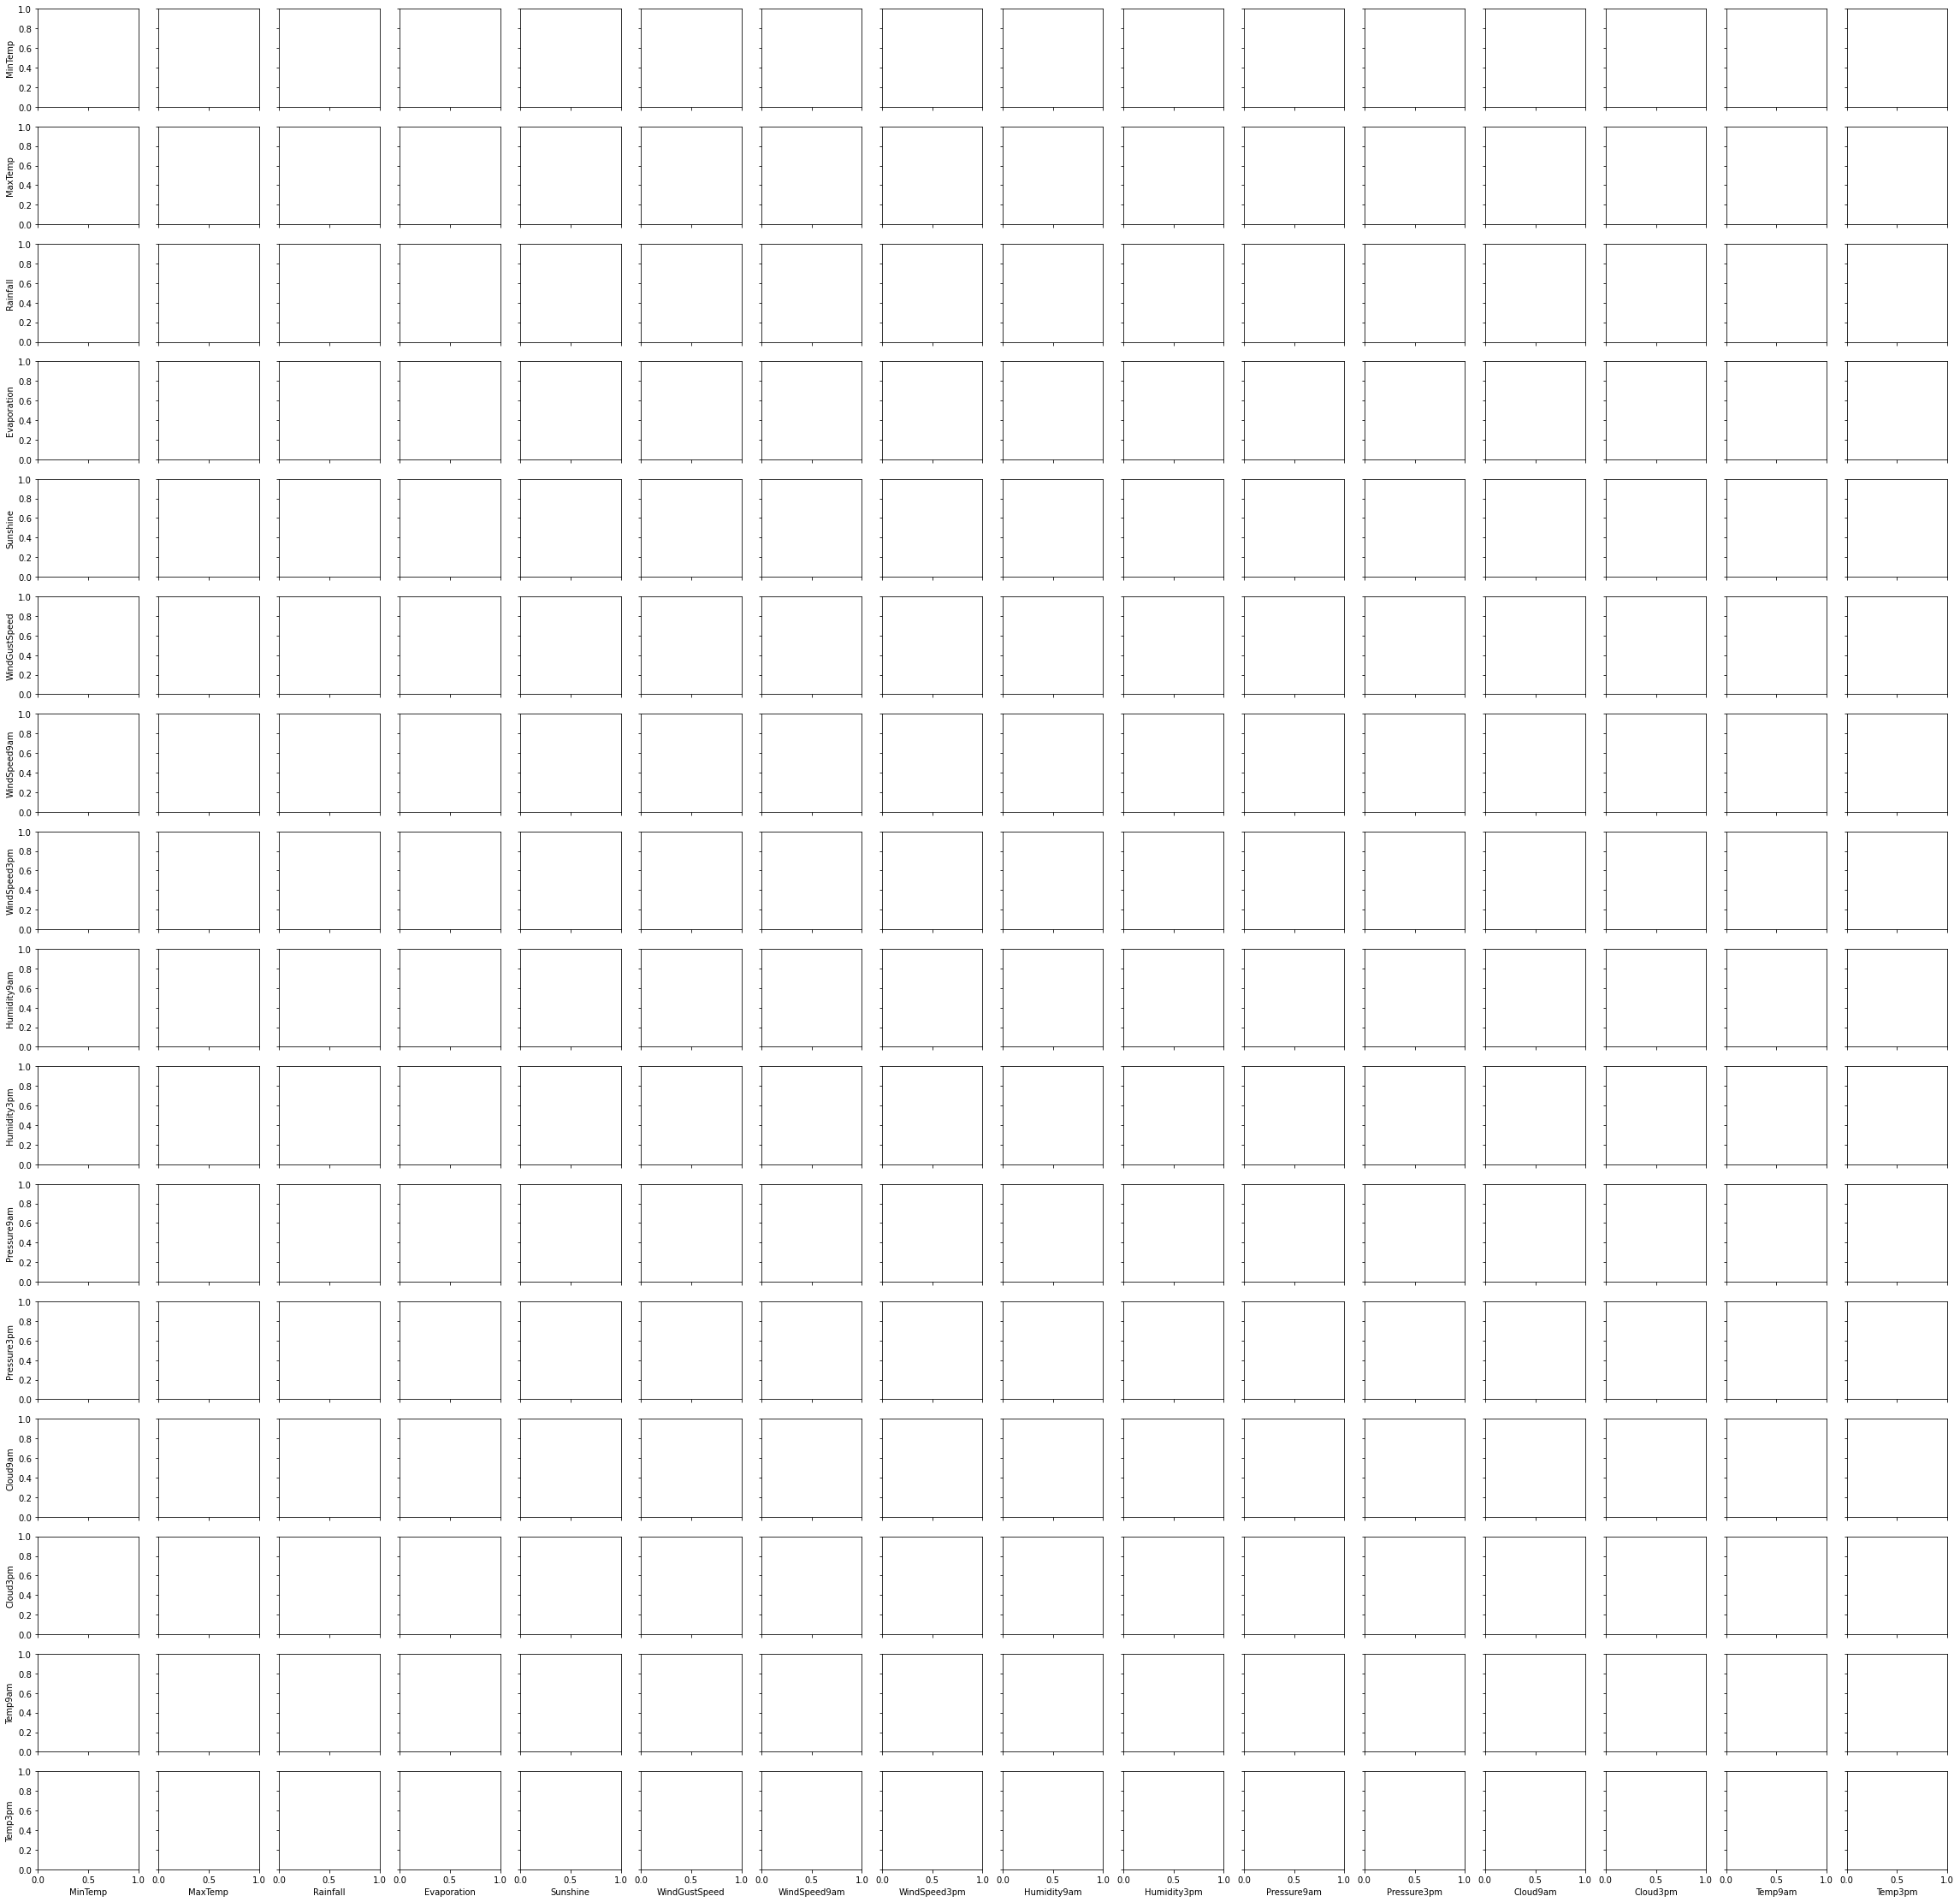

In [177]:
plt.figure(figsize=(20,40))
sns.pairplot(df2,palette='Dark2')
plt.show()

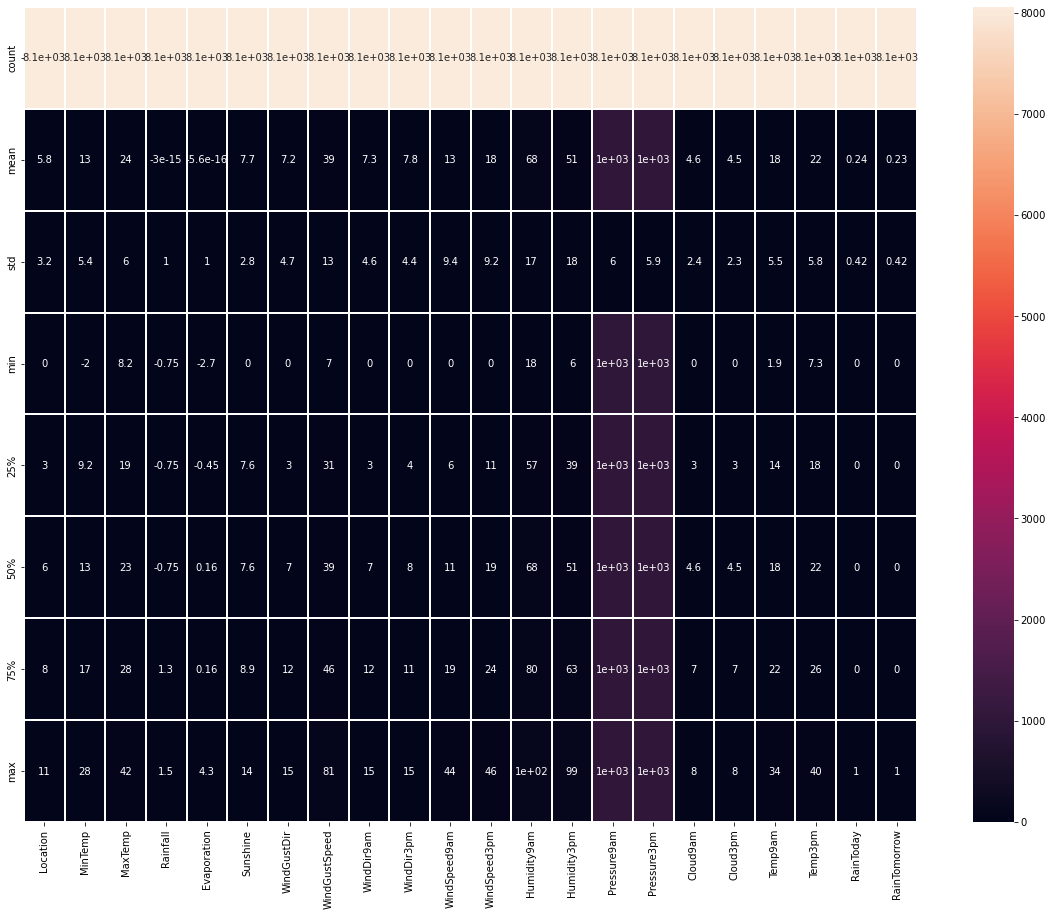

In [199]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.describe(),annot=True,linewidth=.2,fmt='.2g')
plt.show()

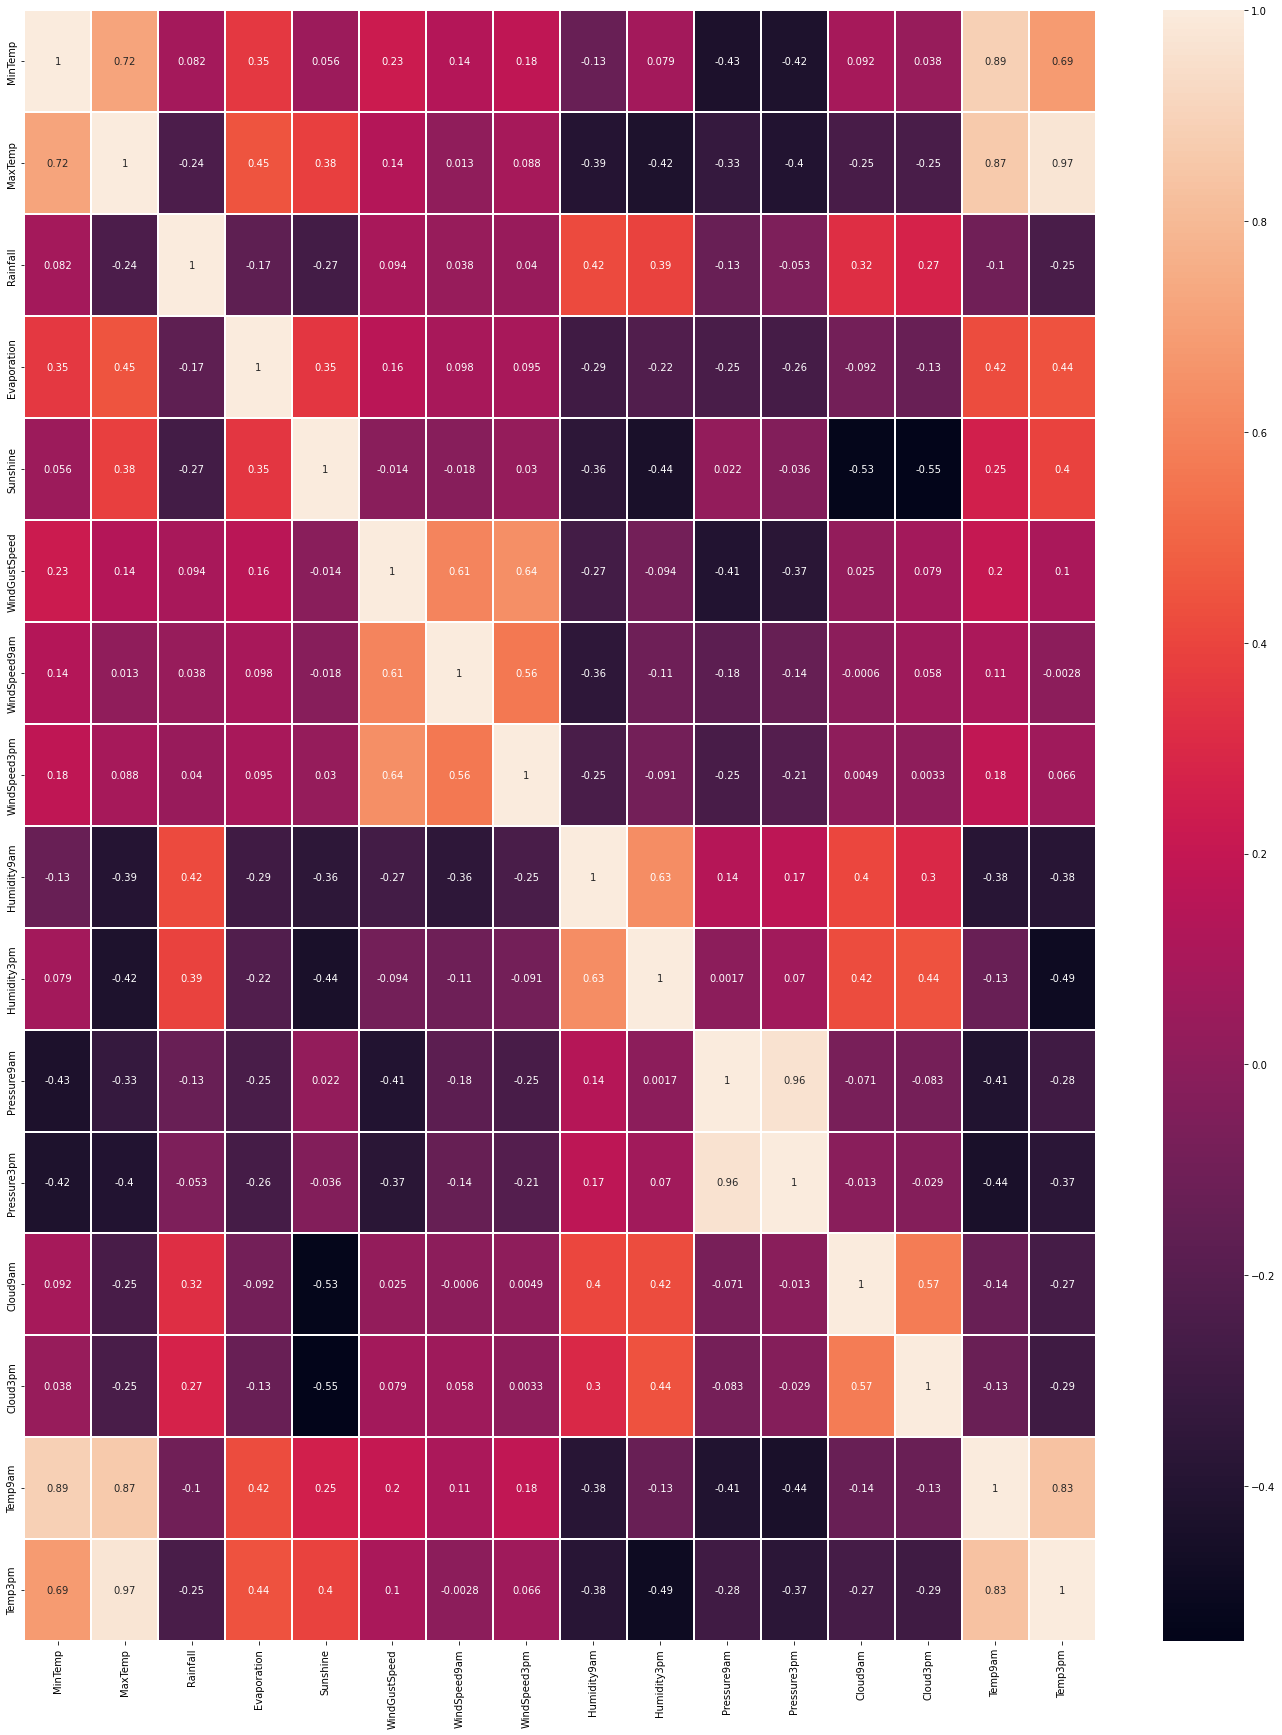

In [179]:
plt.figure(figsize=(24,30))
sns.heatmap(df.corr(),annot=True,linewidth=.2,fmt='.2g')
plt.show()

In [200]:
df2.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.112392,0.059971,0.025511,0.134468,0.052011,-0.036866,0.242701,-0.037471,-0.028631,...,0.004282,0.060498,-0.020853,-0.008024,0.040861,0.024938,0.113971,0.056328,0.003992,0.006083
MinTemp,0.112392,1.000000,0.715135,0.076890,0.364873,0.052712,-0.152880,0.231829,-0.042845,-0.154498,...,-0.115285,0.099298,-0.432738,-0.426644,0.096282,0.044200,0.887660,0.683369,0.074268,0.097505
MaxTemp,0.059971,0.715135,1.000000,-0.245867,0.460620,0.378619,-0.233837,0.131388,-0.217229,-0.190427,...,-0.379830,-0.406524,-0.330494,-0.411881,-0.252510,-0.246686,0.863537,0.974443,-0.217400,-0.151052
Rainfall,0.025511,0.076890,-0.245867,1.000000,-0.193167,-0.278374,0.139338,0.087884,0.158862,0.120186,...,0.418424,0.392525,-0.119967,-0.039062,0.318209,0.276680,-0.110192,-0.256905,0.819489,0.317803
Evaporation,0.134468,0.364873,0.460620,-0.193167,1.000000,0.362934,-0.112286,0.181982,-0.099871,-0.032430,...,-0.303180,-0.217281,-0.255692,-0.268572,-0.106105,-0.138118,0.430639,0.446516,-0.152396,-0.085616
Sunshine,0.052011,0.052712,0.378619,-0.278374,0.362934,1.000000,-0.102394,0.000292,-0.079038,-0.064432,...,-0.371323,-0.440510,0.004777,-0.055303,-0.530487,-0.543593,0.250883,0.395150,-0.230360,-0.324035
WindGustDir,-0.036866,-0.152880,-0.233837,0.139338,-0.112286,-0.102394,1.000000,0.018463,0.406611,0.505711,...,0.028353,0.048396,-0.100079,-0.013426,0.122322,0.091989,-0.183015,-0.246794,0.118502,0.043846
WindGustSpeed,0.242701,0.231829,0.131388,0.087884,0.181982,0.000292,0.018463,1.000000,-0.060552,0.078674,...,-0.257222,-0.078015,-0.374213,-0.331649,0.021410,0.069458,0.196329,0.096000,0.083862,0.185492
WindDir9am,-0.037471,-0.042845,-0.217229,0.158862,-0.099871,-0.079038,0.406611,-0.060552,1.000000,0.245983,...,0.013733,0.121696,-0.008056,0.078765,0.095645,0.064036,-0.101824,-0.224881,0.151747,0.032155
WindDir3pm,-0.028631,-0.154498,-0.190427,0.120186,-0.032430,-0.064432,0.505711,0.078674,0.245983,1.000000,...,-0.008663,-0.011370,-0.131706,-0.039105,0.071576,0.050742,-0.173364,-0.202397,0.098049,0.003979


Now make partition between the Feature(x) and the Label(y).

In [235]:
x=df2.drop('RainTomorrow',axis=1)
y=df2['RainTomorrow']
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1.0,13.4,22.9,1.083442,0.162336,7.632205,13.0,44.0,13.0,14.0,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0
1,1.0,7.4,25.1,-0.748223,0.162336,7.632205,14.0,44.0,6.0,15.0,...,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0
2,1.0,12.9,25.7,-0.748223,0.162336,7.632205,15.0,46.0,13.0,15.0,...,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0
3,1.0,9.2,28.0,-0.748223,0.162336,7.632205,4.0,24.0,9.0,0.0,...,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0
4,1.0,17.5,32.3,1.257406,0.162336,7.632205,13.0,41.0,1.0,7.0,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.4,-0.748223,0.162336,7.632205,0.0,31.0,9.0,1.0,...,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0
8421,9.0,3.6,25.3,-0.748223,0.162336,7.632205,6.0,22.0,9.0,3.0,...,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0
8422,9.0,5.4,26.9,-0.748223,0.162336,7.632205,3.0,37.0,9.0,14.0,...,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0
8423,9.0,7.8,27.0,-0.748223,0.162336,7.632205,9.0,28.0,10.0,3.0,...,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0


In [185]:
y

0       No
1       No
2       No
3       No
4       No
        ..
8420    No
8421    No
8422    No
8423    No
8424    No
Name: RainTomorrow, Length: 8425, dtype: object

In [202]:
x.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
dtype: object

In [203]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.515776,0.038248,-0.156352,0.534236,0.195503,1.257472e-15,1.229643,0.287630,1.249535,1.397222,...,0.562679,0.189365,-1.597239,-1.585474,-1.310257,1.413459,3.862851e-16,-0.153712,-0.108138,-0.556099
1,-1.515776,-1.077164,0.203458,-0.698529,0.195503,1.257472e-15,1.442303,0.287630,-0.276260,1.622961,...,0.356585,-1.420342,-1.433401,-1.123353,-1.197664,0.000000,3.862851e-16,-0.100217,0.312348,-0.556099
2,-1.515776,-0.054703,0.301588,-0.698529,0.195503,1.257472e-15,1.654964,0.432763,1.249535,1.622961,...,0.768772,-1.778055,-1.160339,-1.601409,-1.052903,0.000000,-1.088680e+00,0.577390,0.127334,-0.556099
3,-1.515776,-0.742540,0.677754,-0.698529,0.195503,1.257472e-15,-0.684299,-1.163698,0.377652,-1.763120,...,-0.983024,-1.360723,-1.924914,-0.007891,-0.393434,0.000000,3.862851e-16,0.060269,0.682376,-0.556099
4,-1.515776,0.800447,1.381019,0.888946,0.195503,1.257472e-15,1.229643,0.069931,-1.366114,-0.182949,...,0.150491,0.845171,-0.996501,-1.091483,-1.487187,1.001777,1.520830e+00,0.006773,1.220599,-0.556099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,-1.932313,-0.074577,-0.698529,0.195503,1.257472e-15,-1.534940,-0.655733,0.377652,-1.537381,...,-0.776930,-1.003011,-1.488014,1.107572,0.812911,0.000000,3.862851e-16,-1.366273,-0.007221,-0.556099
8421,1.013895,-1.783591,0.236168,-0.698529,0.195503,1.257472e-15,-0.258979,-1.308831,0.377652,-1.085904,...,-0.983024,-0.704917,-1.651851,0.932285,0.619896,0.000000,3.862851e-16,-1.223619,0.345987,-0.556099
8422,1.013895,-1.448968,0.497848,-0.698529,0.195503,1.257472e-15,-0.896959,-0.220335,0.377652,1.397222,...,-0.983024,-0.883773,-1.488014,0.533905,0.249950,0.000000,3.862851e-16,-0.938310,0.615099,-0.556099
8423,1.013895,-1.002803,0.514203,-0.698529,0.195503,1.257472e-15,0.379002,-0.873433,0.595623,-1.085904,...,-1.189118,-1.003011,-1.488014,0.278942,0.201696,-0.644950,-1.088680e+00,-0.474684,0.598279,-0.556099


In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=x.columns
vif['VIF']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Feature,VIF
0,Location,1.157657
1,MinTemp,8.137718
2,MaxTemp,26.345040
3,Rainfall,5.113768
4,Evaporation,1.458660
5,Sunshine,1.929885
6,WindGustDir,1.581783
7,WindGustSpeed,2.441374
8,WindDir9am,1.335557
9,WindDir3pm,1.475832


In [206]:
x.drop('Temp3pm',axis=1,inplace=True)

x  # now again check multicolinearity of whole dataframe to by vif method. 

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday
0,-1.515776,0.038248,-0.156352,0.534236,0.195503,1.257472e-15,1.229643,0.287630,1.249535,1.397222,0.608197,0.562679,0.189365,-1.597239,-1.585474,-1.310257,1.413459,3.862851e-16,-0.153712,-0.556099
1,-1.515776,-1.077164,0.203458,-0.698529,0.195503,1.257472e-15,1.442303,0.287630,-0.276260,1.622961,-0.971536,0.356585,-1.420342,-1.433401,-1.123353,-1.197664,0.000000,3.862851e-16,-0.100217,-0.556099
2,-1.515776,-0.054703,0.301588,-0.698529,0.195503,1.257472e-15,1.654964,0.432763,1.249535,1.622961,0.509464,0.768772,-1.778055,-1.160339,-1.601409,-1.052903,0.000000,-1.088680e+00,0.577390,-0.556099
3,-1.515776,-0.742540,0.677754,-0.698529,0.195503,1.257472e-15,-0.684299,-1.163698,0.377652,-1.763120,-0.280403,-0.983024,-1.360723,-1.924914,-0.007891,-0.393434,0.000000,3.862851e-16,0.060269,-0.556099
4,-1.515776,0.800447,1.381019,0.888946,0.195503,1.257472e-15,1.229643,0.069931,-1.366114,-0.182949,-0.675336,0.150491,0.845171,-0.996501,-1.091483,-1.487187,1.001777,1.520830e+00,0.006773,-0.556099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,-1.932313,-0.074577,-0.698529,0.195503,1.257472e-15,-1.534940,-0.655733,0.377652,-1.537381,-0.082936,-0.776930,-1.003011,-1.488014,1.107572,0.812911,0.000000,3.862851e-16,-1.366273,-0.556099
8421,1.013895,-1.783591,0.236168,-0.698529,0.195503,1.257472e-15,-0.258979,-1.308831,0.377652,-1.085904,-0.082936,-0.983024,-0.704917,-1.651851,0.932285,0.619896,0.000000,3.862851e-16,-1.223619,-0.556099
8422,1.013895,-1.448968,0.497848,-0.698529,0.195503,1.257472e-15,-0.896959,-0.220335,0.377652,1.397222,-0.477869,-0.983024,-0.883773,-1.488014,0.533905,0.249950,0.000000,3.862851e-16,-0.938310,-0.556099
8423,1.013895,-1.002803,0.514203,-0.698529,0.195503,1.257472e-15,0.379002,-0.873433,0.595623,-1.085904,-0.082936,-1.189118,-1.003011,-1.488014,0.278942,0.201696,-0.644950,-1.088680e+00,-0.474684,-0.556099


In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=x.columns
vif['VIF']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Feature,VIF
0,Location,1.156458
1,MinTemp,8.065230
2,MaxTemp,9.704062
3,Rainfall,5.113749
4,Evaporation,1.456326
5,Sunshine,1.929426
6,WindGustDir,1.578528
7,WindGustSpeed,2.423439
8,WindDir9am,1.334736
9,WindDir3pm,1.474848


In [208]:
x.drop('Pressure9am',axis=1,inplace=True)

x  # now again check multicolinearity of whole dataframe to by vif method. 

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday
0,-1.515776,0.038248,-0.156352,0.534236,0.195503,1.257472e-15,1.229643,0.287630,1.249535,1.397222,0.608197,0.562679,0.189365,-1.597239,-1.310257,1.413459,3.862851e-16,-0.153712,-0.556099
1,-1.515776,-1.077164,0.203458,-0.698529,0.195503,1.257472e-15,1.442303,0.287630,-0.276260,1.622961,-0.971536,0.356585,-1.420342,-1.433401,-1.197664,0.000000,3.862851e-16,-0.100217,-0.556099
2,-1.515776,-0.054703,0.301588,-0.698529,0.195503,1.257472e-15,1.654964,0.432763,1.249535,1.622961,0.509464,0.768772,-1.778055,-1.160339,-1.052903,0.000000,-1.088680e+00,0.577390,-0.556099
3,-1.515776,-0.742540,0.677754,-0.698529,0.195503,1.257472e-15,-0.684299,-1.163698,0.377652,-1.763120,-0.280403,-0.983024,-1.360723,-1.924914,-0.393434,0.000000,3.862851e-16,0.060269,-0.556099
4,-1.515776,0.800447,1.381019,0.888946,0.195503,1.257472e-15,1.229643,0.069931,-1.366114,-0.182949,-0.675336,0.150491,0.845171,-0.996501,-1.487187,1.001777,1.520830e+00,0.006773,-0.556099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,-1.932313,-0.074577,-0.698529,0.195503,1.257472e-15,-1.534940,-0.655733,0.377652,-1.537381,-0.082936,-0.776930,-1.003011,-1.488014,0.812911,0.000000,3.862851e-16,-1.366273,-0.556099
8421,1.013895,-1.783591,0.236168,-0.698529,0.195503,1.257472e-15,-0.258979,-1.308831,0.377652,-1.085904,-0.082936,-0.983024,-0.704917,-1.651851,0.619896,0.000000,3.862851e-16,-1.223619,-0.556099
8422,1.013895,-1.448968,0.497848,-0.698529,0.195503,1.257472e-15,-0.896959,-0.220335,0.377652,1.397222,-0.477869,-0.983024,-0.883773,-1.488014,0.249950,0.000000,3.862851e-16,-0.938310,-0.556099
8423,1.013895,-1.002803,0.514203,-0.698529,0.195503,1.257472e-15,0.379002,-0.873433,0.595623,-1.085904,-0.082936,-1.189118,-1.003011,-1.488014,0.201696,-0.644950,-1.088680e+00,-0.474684,-0.556099


In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=x.columns
vif['VIF']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Feature,VIF
0,Location,1.156237
1,MinTemp,7.920936
2,MaxTemp,9.310227
3,Rainfall,5.086510
4,Evaporation,1.442792
5,Sunshine,1.926219
6,WindGustDir,1.564529
7,WindGustSpeed,2.405851
8,WindDir9am,1.316176
9,WindDir3pm,1.395292


In [210]:
x.drop('Temp9am',axis=1,inplace=True)

x  # now again check multicolinearity of whole dataframe to by vif method. 

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,-1.515776,0.038248,-0.156352,0.534236,0.195503,1.257472e-15,1.229643,0.287630,1.249535,1.397222,0.608197,0.562679,0.189365,-1.597239,-1.310257,1.413459,3.862851e-16,-0.556099
1,-1.515776,-1.077164,0.203458,-0.698529,0.195503,1.257472e-15,1.442303,0.287630,-0.276260,1.622961,-0.971536,0.356585,-1.420342,-1.433401,-1.197664,0.000000,3.862851e-16,-0.556099
2,-1.515776,-0.054703,0.301588,-0.698529,0.195503,1.257472e-15,1.654964,0.432763,1.249535,1.622961,0.509464,0.768772,-1.778055,-1.160339,-1.052903,0.000000,-1.088680e+00,-0.556099
3,-1.515776,-0.742540,0.677754,-0.698529,0.195503,1.257472e-15,-0.684299,-1.163698,0.377652,-1.763120,-0.280403,-0.983024,-1.360723,-1.924914,-0.393434,0.000000,3.862851e-16,-0.556099
4,-1.515776,0.800447,1.381019,0.888946,0.195503,1.257472e-15,1.229643,0.069931,-1.366114,-0.182949,-0.675336,0.150491,0.845171,-0.996501,-1.487187,1.001777,1.520830e+00,-0.556099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,-1.932313,-0.074577,-0.698529,0.195503,1.257472e-15,-1.534940,-0.655733,0.377652,-1.537381,-0.082936,-0.776930,-1.003011,-1.488014,0.812911,0.000000,3.862851e-16,-0.556099
8421,1.013895,-1.783591,0.236168,-0.698529,0.195503,1.257472e-15,-0.258979,-1.308831,0.377652,-1.085904,-0.082936,-0.983024,-0.704917,-1.651851,0.619896,0.000000,3.862851e-16,-0.556099
8422,1.013895,-1.448968,0.497848,-0.698529,0.195503,1.257472e-15,-0.896959,-0.220335,0.377652,1.397222,-0.477869,-0.983024,-0.883773,-1.488014,0.249950,0.000000,3.862851e-16,-0.556099
8423,1.013895,-1.002803,0.514203,-0.698529,0.195503,1.257472e-15,0.379002,-0.873433,0.595623,-1.085904,-0.082936,-1.189118,-1.003011,-1.488014,0.201696,-0.644950,-1.088680e+00,-0.556099


In [211]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,-1.515776,0.038248,-0.156352,0.534236,0.195503,1.257472e-15,1.229643,0.287630,1.249535,1.397222,0.608197,0.562679,0.189365,-1.597239,-1.310257,1.413459,3.862851e-16,-0.556099
1,-1.515776,-1.077164,0.203458,-0.698529,0.195503,1.257472e-15,1.442303,0.287630,-0.276260,1.622961,-0.971536,0.356585,-1.420342,-1.433401,-1.197664,0.000000,3.862851e-16,-0.556099
2,-1.515776,-0.054703,0.301588,-0.698529,0.195503,1.257472e-15,1.654964,0.432763,1.249535,1.622961,0.509464,0.768772,-1.778055,-1.160339,-1.052903,0.000000,-1.088680e+00,-0.556099
3,-1.515776,-0.742540,0.677754,-0.698529,0.195503,1.257472e-15,-0.684299,-1.163698,0.377652,-1.763120,-0.280403,-0.983024,-1.360723,-1.924914,-0.393434,0.000000,3.862851e-16,-0.556099
4,-1.515776,0.800447,1.381019,0.888946,0.195503,1.257472e-15,1.229643,0.069931,-1.366114,-0.182949,-0.675336,0.150491,0.845171,-0.996501,-1.487187,1.001777,1.520830e+00,-0.556099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,-1.932313,-0.074577,-0.698529,0.195503,1.257472e-15,-1.534940,-0.655733,0.377652,-1.537381,-0.082936,-0.776930,-1.003011,-1.488014,0.812911,0.000000,3.862851e-16,-0.556099
8421,1.013895,-1.783591,0.236168,-0.698529,0.195503,1.257472e-15,-0.258979,-1.308831,0.377652,-1.085904,-0.082936,-0.983024,-0.704917,-1.651851,0.619896,0.000000,3.862851e-16,-0.556099
8422,1.013895,-1.448968,0.497848,-0.698529,0.195503,1.257472e-15,-0.896959,-0.220335,0.377652,1.397222,-0.477869,-0.983024,-0.883773,-1.488014,0.249950,0.000000,3.862851e-16,-0.556099
8423,1.013895,-1.002803,0.514203,-0.698529,0.195503,1.257472e-15,0.379002,-0.873433,0.595623,-1.085904,-0.082936,-1.189118,-1.003011,-1.488014,0.201696,-0.644950,-1.088680e+00,-0.556099


In [212]:
y.value_counts()

0.0    6434
1.0    1991
Name: RainTomorrow, dtype: int64

In [214]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

x,y = sm.fit_resample(x,y)

In [215]:
y.value_counts()

0.0    6434
1.0    6434
Name: RainTomorrow, dtype: int64

In [217]:
from sklearn.metrics import r2_score,accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.1535621136012365 at Random_state 74


In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [219]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=74)

In [220]:
models=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),RandomForestClassifier(), ExtraTreesClassifier()]

def sklearn_model_accuracy():
    for model in models:
       
    
        print(model)
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print(accuracy_score(y_test,model_predict))
        print(confusion_matrix(y_test,model_predict))
        print(classification_report(y_test,model_predict))
        print(r2_score(y_test,model_predict))
        print(roc_auc_score(y_test,model_predict))
        print("-------------------------------------------------------------")


In [221]:
sklearn_model_accuracy()

LogisticRegression()
0.7883967883967884
[[1530  390]
 [ 427 1514]]
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      1920
         1.0       0.80      0.78      0.79      1941

    accuracy                           0.79      3861
   macro avg       0.79      0.79      0.79      3861
weighted avg       0.79      0.79      0.79      3861

0.1535621136012365
0.7884426519835137
-------------------------------------------------------------
DecisionTreeClassifier()
0.8697228697228697
[[1635  285]
 [ 218 1723]]
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      1920
         1.0       0.86      0.89      0.87      1941

    accuracy                           0.87      3861
   macro avg       0.87      0.87      0.87      3861
weighted avg       0.87      0.87      0.87      3861

0.47887606259659976
0.8696246297011849
-------------------------------------------------------------
SVC()
0

In [224]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [225]:
extratrees_params = {'criterion': ['gini','entropy'],
                   'random_state':[10,50,],
                   'max_depth':[0,10,20],
                   'n_jobs':[-2,-1,1],
                   'n_estimators':[50,100,300]}
grid_classifier = GridSearchCV(ExtraTreesClassifier(),extratrees_params,cv=5,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
The best parameters are {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300, 'n_jobs': -2, 'random_state': 50}
The best Score is 0.917731978965934


In [226]:
best_model=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=300, n_jobs=-2, random_state=50)
best_model.fit(x_train,y_train)
etc_predict=best_model.predict(x_test)
etc_accuracy=accuracy_score(y_test,etc_predict)
print(etc_accuracy*100)

94.14659414659414


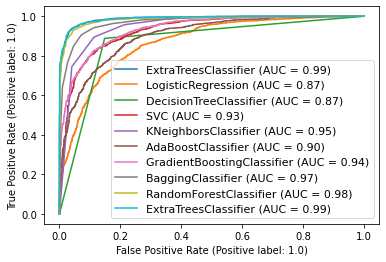

In [227]:
from sklearn.metrics import plot_roc_curve

dist=plot_roc_curve(ExtraTreesClassifier().fit(x_train,y_train),x_test,y_test)

for i in models:
    plot_roc_curve(i,x_test,y_test,ax=dist.ax_)
plt.legend(prop={'size':11}, loc= 'lower right')
plt.show()

In [230]:
import joblib
joblib.dump(best_model,"Rainfall_prediction_RainTomorrow.pkl")

['Rainfall_prediction_RainTomorrow.pkl']

In [231]:
mod = joblib.load("Rainfall_prediction_RainTomorrow.pkl")
actual_data = np.array(y_test)
predicted_data = np.array(mod.predict(x_test))
df_comparision = pd.DataFrame({'actual data':actual_data,'predicted value':predicted_data})
df_comparision

,actual data,predicted value
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
3856,0.0,0.0
3857,1.0,1.0
3858,1.0,1.0
3859,1.0,1.0
